## Set Up

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_listings = pd.read_csv(r'listings.csv')
df_reviews = pd.read_csv(r'reviews.csv')
df_calendar = pd.read_csv(r'calendar.csv')

In [ ]:
# Hiển thị toàn bộ các cột trong DataFrame
pd.set_option('display.max_columns', None)

In [ ]:
df_listings.sample(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
17841,1010504926191319860,https://www.airbnb.com/rooms/1010504926191319860,20240626142103,2024-06-27,city scrape,3 min from MRT / So-K Homey:4th Floor (Grey No.2),If you are finding a cozy and comfortable room...,Place to eat :<br />- So-K Cafe : on the 1st f...,https://a0.muscache.com/pictures/miso/Hosting-...,543209319,https://www.airbnb.com/users/show/543209319,Yaneesa,2023-10-24,"Bangkok, Thailand",NaN,within an hour,100%,71%,f,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,NaN,12,13,['phone'],t,t,"Khet Samphanthawong, Krung Thep Maha Nakhon, T...",Samphanthawong,NaN,13.737908,100.514059,Private room in rental unit,Private room,4,1.0,1 private bath,1.0,2.0,"[""Shampoo"", ""Smoke alarm"", ""Exterior security ...","$1,286.00",2,365,2,2,365,365,2.0,365.0,NaN,t,28,58,88,268,2024-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,12,0,12,0,NaN
3969,22893990,https://www.airbnb.com/rooms/22893990,20240626142103,2024-06-27,previous scrape,China Guest Inn,China Inn is along Silom Road in Bangkok’s Bus...,It near by Chongnonsi BTS on Silom Road,https://a0.muscache.com/pictures/500d1ee7-7b62...,133169241,https://www.airbnb.com/users/show/133169241,Taweerat,2017-06-02,"Bangkok, Thailand",Welcome,NaN,NaN,0%,f,https://a0.muscache.com/im/pictures/user/62a0b...,https://a0.muscache.com/im/pictures/user/62a0b...,NaN,1,1,"['email', 'phone']",t,t,"กรุงเทพมหานคร, Thailand",Bang Rak,NaN,13.724850,100.524640,Private room in townhouse,Private room,2,NaN,1 private bath,NaN,NaN,"[""Luggage dropoff allowed"", ""Shampoo"", ""Long t...",NaN,1,1125,1,1,1125,1125,1.0,1125.0,NaN,t,23,53,83,358,2024-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
9823,49200733,https://www.airbnb.com/rooms/49200733,20240626142103,2024-06-27,city scrape,Stylish Loft w Premium Amenities - Near BTS Ek...,One-of-a-kind accommodation located in the hea...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,363232735,https://www.airbnb.com/users/show/363232735,THA City Loft,2020-08-19,NaN,NaN,within an hour,100%,97%,f,https://a0.muscache.com/im/pictures/user/56ef0...,https://a0.muscache.com/im/pictures/user/56ef0...,NaN,2,2,"['email', 'phone']",t,t,NaN,Vadhana,NaN,13.726281,100.587090,Room in hotel,Private room,2,1.0,1 private bath,1.0,2.0,"[""Shampoo"", ""Dedicated workspace"", ""Smoke alar...","$1,349.00",1,60,1,1,60,60,1.0,60.0,NaN,t,30,60,90,365,2024-06-27,13,11,0,2023-04-07,2024-04-30,4.31,4.54,4.54,4.77,4.54,4.62,4.23,NaN,t,2,0,2,0,0.87


In [ ]:
df_listings.shape

(23651, 75)

In [ ]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23651 entries, 0 to 23650
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            23651 non-null  int64  
 1   listing_url                                   23651 non-null  object 
 2   scrape_id                                     23651 non-null  int64  
 3   last_scraped                                  23651 non-null  object 
 4   source                                        23651 non-null  object 
 5   name                                          23651 non-null  object 
 6   description                                   22820 non-null  object 
 7   neighborhood_overview                         10195 non-null  object 
 8   picture_url                                   23651 non-null  object 
 9   host_id                                       23651 non-null 

In [ ]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.365100e+04,2.365100e+04,2.365100e+04,23651.000000,23651.000000,0.0,23651.000000,23651.000000,23651.000000,19009.000000,22403.000000,18973.000000,23651.000000,23651.00000,23651.000000,23651.000000,2.365100e+04,2.365100e+04,23651.000000,2.365100e+04,0.0,23651.000000,23651.000000,23651.000000,23651.000000,23651.000000,23651.000000,23651.000000,15428.000000,15406.000000,15405.000000,15401.000000,15405.000000,15400.000000,15399.000000,23651.000000,23651.000000,23651.000000,23651.000000,15428.000000
mean,5.403521e+17,2.024063e+13,2.263407e+08,36.038476,47.144349,NaN,13.744591,100.561384,3.129593,1.419091,1.408651,1.683603,13.330726,558.79726,12.723098,13.455922,7.271012e+05,7.271116e+05,13.256116,7.271066e+05,NaN,17.354700,38.602342,61.864615,218.405607,18.559807,6.248066,0.447888,4.704959,4.738035,4.695268,4.768829,4.799001,4.652725,4.668293,21.136569,15.356771,5.285696,0.261046,1.043228
std,4.890466e+17,7.363437e+00,1.895397e+08,89.144598,115.031662,NaN,0.041615,0.049349,2.288401,1.078821,1.490077,2.257250,43.698716,995.35602,41.241840,42.831127,3.948987e+07,3.948987e+07,41.586383,3.948987e+07,NaN,12.145839,23.064644,33.104393,127.506194,47.048193,16.333625,1.392953,0.476233,0.459442,0.474784,0.461783,0.431815,0.464052,0.485884,37.280612,32.515888,20.057969,1.427461,1.548647
min,2.793400e+04,2.024063e+13,2.144700e+04,0.000000,0.000000,NaN,13.527300,100.329550,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,3.183852e+07,2.024063e+13,5.041337e+07,2.000000,3.000000,NaN,13.719754,100.531073,2.000000,1.000000,1.000000,1.000000,1.000000,365.00000,1.000000,1.000000,3.650000e+02,3.650000e+02,1.000000,3.650000e+02,NaN,3.000000,19.000000,41.000000,99.000000,0.000000,0.000000,0.000000,4.630000,4.670000,4.600000,4.740000,4.780000,4.510000,4.580000,2.000000,0.000000,0.000000,0.000000,0.210000
50%,7.403780e+17,2.024063e+13,1.787973e+08,8.000000,10.000000,NaN,13.738563,100.563410,2.000000,1.000000,1.000000,1.000000,2.000000,365.00000,1.000000,2.000000,3.650000e+02,7.300000e+02,2.000000,7.000000e+02,NaN,22.000000,50.000000,79.000000,259.000000,2.000000,1.000000,0.000000,4.830000,4.880000,4.830000,4.920000,4.940000,4.760000,4.790000,6.000000,2.000000,0.000000,0.000000,0.570000
75%,1.009069e+18,2.024063e+13,4.030102e+08,31.000000,39.000000,NaN,13.758400,100.585160,4.000000,1.500000,1.000000,2.000000,7.000000,1125.00000,7.000000,10.000000,1.125000e+03,1.125000e+03,10.000000,1.125000e+03,NaN,29.000000,59.000000,89.000000,348.000000,16.000000,6.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,24.000000,16.000000,3.000000,0.000000,1.350000
max,1.186895e+18,2.024063e+13,5.855942e+08,1032.000000,2072.000000,NaN,13.952276,100.923710,16.000000,24.000000,50.000000,150.000000,1115.000000,100000.00000,1115.000000,1115.000000,2.147484e+09,2.147484e+09,1115.000000,2.147484e+09,NaN,30.000000,60.000000,90.000000,365.000000,2119.000000,886.000000,47.000000,5.000000,5.000000,5.000000,5.0

## Data Cleaning

In [ ]:
df_listings.rename(columns={'id' : 'listing_id'},inplace=True)

In [ ]:
df_listings['listing_id'].duplicated().sum()

0

In [ ]:
df_listings.drop(['neighborhood_overview','host_about','host_neighbourhood','neighbourhood','neighbourhood_group_cleansed','calendar_updated','license'],axis=1,inplace=True)

In [ ]:
# Loại bỏ các ký tự {'$' , ','} và thay đổi định dạng cột
df_listings['price'] = df_listings['price'].replace({'\$': '', ',': ''}, regex=True)

df_listings['price'] = df_listings['price'].astype(float)

In [ ]:
df_listings['price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 23651 entries, 0 to 23650
Series name: price
Non-Null Count  Dtype  
--------------  -----  
19012 non-null  float64
dtypes: float64(1)
memory usage: 184.9 KB


In [ ]:
df_listings['price'].isnull().sum()

4639

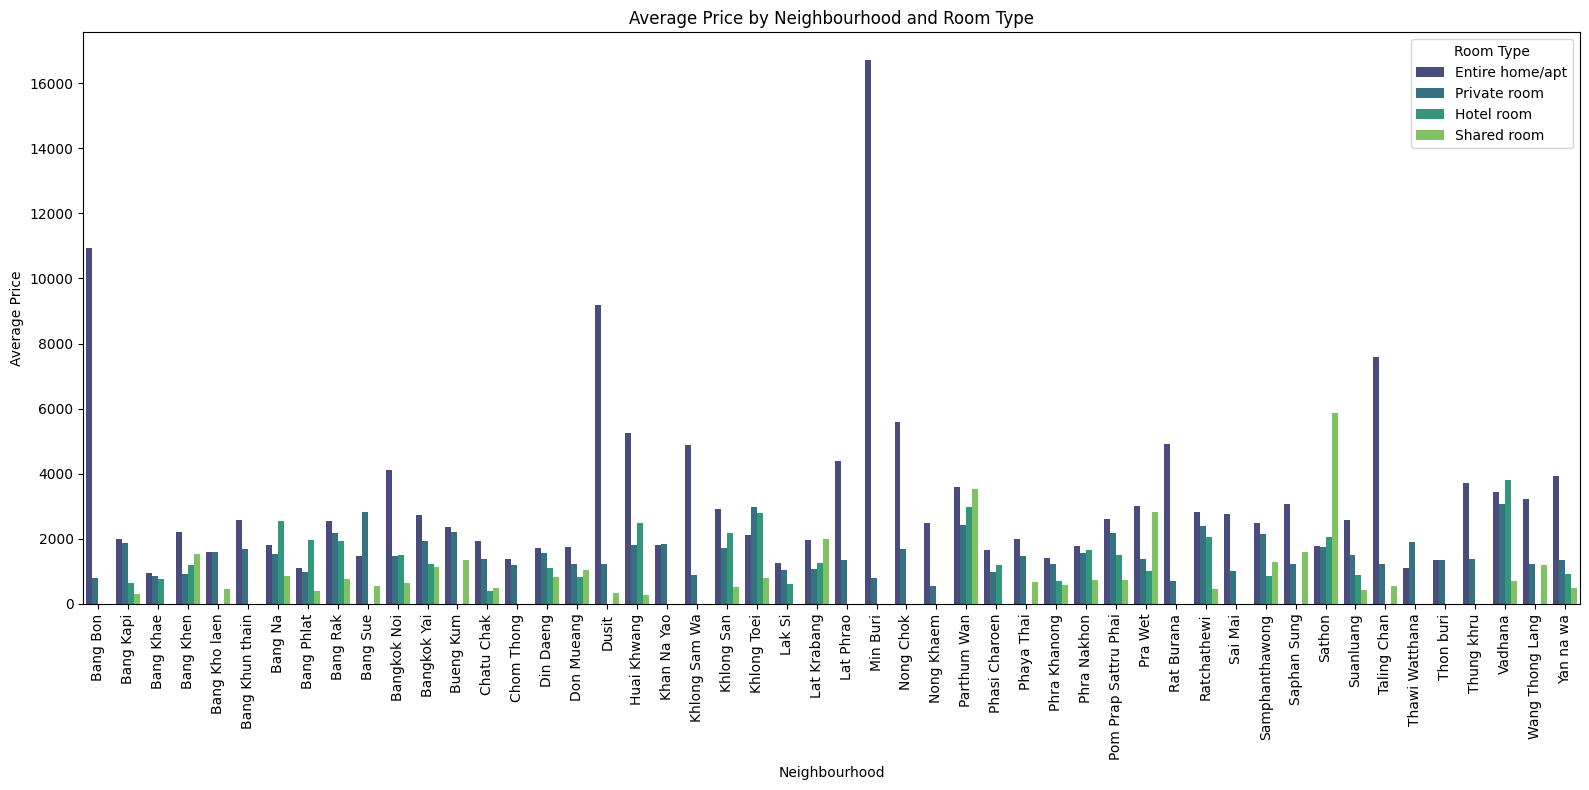

In [ ]:
# biểu đồ thể hiện giá trung bình theo neighbourhood_cleansed và room_type
avg_price = df_listings.groupby(['neighbourhood_cleansed', 'room_type'])['price'].mean().reset_index()

plt.figure(figsize=(16, 8))
sns.barplot(
    data=avg_price,
    x='neighbourhood_cleansed',
    y='price',
    hue='room_type',
    palette='viridis'
)

plt.xticks(rotation=90)
plt.title('Average Price by Neighbourhood and Room Type')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price')
plt.legend(title='Room Type')
plt.tight_layout()

plt.show()

In [ ]:
avg_price = df_listings.groupby(['neighbourhood_cleansed', 'room_type'])['price'].mean()

# Điền giá trị null trong cột price với giá trung bình theo neighbourhood_cleansed và room_type
df_listings['price'] = df_listings.apply(
    lambda row: avg_price[row['neighbourhood_cleansed'], row['room_type']]
    if pd.isnull(row['price']) else row['price'],
    axis=1
)

In [ ]:
df_listings['price'].isnull().sum()

8

In [ ]:
df_listings[df_listings['price'].isnull()]

,listing_id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
2135,15059381,https://www.airbnb.com/rooms/15059381,20240626142103,2024-06-27,previous scrape,Kresidence,"My place is close to airports, parks, and beau...",https://a0.muscache.com/pictures/de654a5c-c091...,95206570,https://www.airbnb.com/users/show/95206570,Kresidence26,2016-09-14,"Bangkok, Thailand",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/17dd1...,https://a0.muscache.com/im/pictures/user/17dd1...,1,1,"['email', 'phone']",t,f,Min Buri,13.79208,100.73561,Shared room in rental unit,Shared room,2,NaN,1 shared bath,NaN,NaN,"[""Shampoo"", ""Smoke alarm"", ""Wifi"", ""Hangers"", ...",NaN,1,1125,1,1,1125,1125,1.0,1125.0,NaN,0,0,0,0,2024-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN
2820,17822494,https://www.airbnb.com/rooms/17822494,20240626142103,2024-06-27,previous scrape,Siam Double Standard,Double Standard<br /><br />Bed: 1 double bed<...,https://a0.muscache.com/pictures/eec1f198-9e60...,78953806,https://www.airbnb.com/users/show/78953806,Toon,2016-06-20,"Bangkok, Thailand",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/f9fab...,https://a0.muscache.com/im/pictures/user/f9fab...,1,11,"['email', 'phone']",t,f,Phaya Thai,13.79236,100.55095,Room in hostel,Hotel room,2,NaN,1 shared bath,1.0,NaN,"[""Shampoo"", ""Free parking on premises"", ""Wifi""...",NaN,1,100,1,1,100,100,1.0,100.0,NaN,0,0,0,0,2024-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,0,0,0,NaN
2847,17881811,https://www.airbnb.com/rooms/17881811,20240626142103,2024-06-27,previous scrape,Newly built serviced apt ari,"Pool, gym, WiFi, washer& dryer, Thai breakfast...",https://a0.muscache.com/pictures/79fb8b51-095c...,112529741,https://www.airbnb.com/users/show/112529741,Jiraporn,2017-01-21,"Bangkok, Thailand",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/3a65a...,https://a0.muscache.com/im/pictures/user/3a65a...,8,11,"['email', 'phone']",t,f,Phaya Thai,13.77650,100.54821,Room in serviced apartment,Hotel room,2,NaN,1 bath,1.0,NaN,"[""Shampoo"", ""Smoke alarm"", ""Washer"", ""Wifi"", ""...",NaN,1,1125,1,1,1125,1125,1.0,1125.0,NaN,0,0,0,0,2024-06-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,8,6,1,0,NaN
4240,24213110,https://www.airbnb.com/rooms/24213110,20240626142103,2024-06-27,previous scrape,ProsamgolfHouse,"near Woman's School 2, near Kitthada Golf Cour...",https://a0.muscache.com/pictures/689200a6-53e3...,182519749,https://www.airbnb.com/users/show/182519749,Somkiat,2018-04-04,"Bangkok, Thailand",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/3b5da...,https://a0.muscache.com/im/pictures/user/3b5da...,3,5,"['email', 'phone']",t,f,Lat Phrao,13.82201,100.61271,Shared room in home,Shared room,4,NaN,1 shared bath,NaN,NaN,"[""Shampoo"", ""Bed linens"", ""Hangers"", ""Air cond...",NaN,3,28,3,3,28,28,3.0,28.0,NaN,0,0,0,0,2024-06-

In [ ]:
df_listings.dropna(subset='price',inplace=True)

In [ ]:
df_listings['host_is_superhost'].info()

<class 'pandas.core.series.Series'>
Index: 23643 entries, 0 to 23650
Series name: host_is_superhost
Non-Null Count  Dtype 
--------------  ----- 
22642 non-null  object
dtypes: object(1)
memory usage: 369.4+ KB


In [ ]:
df_listings['host_is_superhost'].value_counts()

,count
host_is_superhost,
f,16225
t,6417


In [ ]:
df_listings['host_is_superhost'].isnull().sum()

1001

In [ ]:
df_superhost_missing = df_listings[df_listings['host_is_superhost'].isnull()]
df_superhost_missing.sample(3)

,listing_id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
20761,1109399636815878266,https://www.airbnb.com/rooms/1109399636815878266,20240626142103,2024-06-27,city scrape,S36 BTS Thonglor Sukhumvit 1bed Swim Gym Sqm 36,This centrally located home brings you back to...,https://a0.muscache.com/pictures/44bc074f-9423...,179336488,https://www.airbnb.com/users/show/179336488,Jc,2018-03-19,"Bangkok, Thailand",within an hour,100%,99%,NaN,https://a0.muscache.com/im/pictures/user/70b49...,https://a0.muscache.com/im/pictures/user/70b49...,64,64,"['email', 'phone']",t,t,Khlong Toei,13.722168,100.575809,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Shampoo"", ""Kitchen"", ""Conditioner"", ""Body so...",1075.0,3,365,3,3,1125,1125,3.0,1125.0,t,21,51,81,261,2024-06-27,6,6,1,2024-03-19,2024-06-14,4.67,5.0,4.80,5.0,5.0,4.20,4.80,t,30,30,0,0,1.78
5510,30393874,https://www.airbnb.com/rooms/30393874,20240626142103,2024-06-26,city scrape,Lovely home 4/531（1828）,My room is near Big C super market as well as ...,https://a0.muscache.com/pictures/a27492eb-a214...,94122642,https://www.airbnb.com/users/show/94122642,Paul.Bkk,2016-09-08,Thailand,within a day,100%,92%,NaN,https://a0.muscache.com/im/pictures/user/d70c4...,https://a0.muscache.com/im/pictures/user/d70c4...,5,5,"['email', 'phone']",t,t,Bang Khae,13.694000,100.391230,Entire rental unit,Entire home/apt,3,1.5,1.5 baths,1.0,2.0,"[""Canal view"", ""Kitchen"", ""Bed linens"", ""Hot w...",370.0,20,1125,30,30,1125,1125,30.0,1125.0,t,0,0,8,283,2024-06-26,7,3,0,2019-06-24,2024-02-25,4.71,5.0,4.86,5.0,5.0,4.71,4.57,t,2,2,0,0,0.11
14358,871515269129349617,https://www.airbnb.com/rooms/871515269129349617,20240626142103,2024-06-27,city scrape,Real Single Home attic/7eleven / new/300mbps W...,One and only detached single house with garden...,https://a0.muscache.com/pictures/miso/Hosting-...,52370590,https://www.airbnb.com/users/show/52370590,Pranee,2015-12-27,"Samut Prakan, Thailand",within a few hours,100%,99%,NaN,https://a0.muscache.com/im/pictures/user/9e48f...,https://a0.muscache.com/im/pictures/user/9e48f...,7,7,"['email', 'phone']",t,t,Huai Khwang,13.792081,100.584587,Entire home,Entire home/apt,1,1.0,1 bath,1.0,1.0,"[""Shampoo"", ""Bidet"", ""Kitchen"", ""Conditioner"",...",750.0,4,1125,4,4,1125,1125,4.0,1125.0,t,5,18,22,164,2024-06-27,7,7,0,2023-07-10,2024-05-19,5.00,5.0,5.00,5.0,5.0,4.86,5.00,f,2,2,0,0,0.59


In [ ]:
df_listings.dropna(subset='host_is_superhost',inplace=True)

In [ ]:
# Loại bỏ các ký tự {'%' , ','} và thay đổi định dạng cột
df_listings['host_response_rate'] = df_listings['host_response_rate'].replace({'%': ''}, regex=True)
df_listings['host_response_rate'] = df_listings['host_response_rate'].astype(float)

df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].replace({'%': ''}, regex=True)
df_listings['host_acceptance_rate'] = df_listings['host_acceptance_rate'].astype(float)

In [ ]:
avg_response_rate = df_listings.groupby(['host_is_superhost', 'room_type'])['host_response_rate'].mean()

# Điền giá trị null trong cột tỉ lệ phản hồi với tỉ lệ trung bình theo superhost và room_type
df_listings['host_response_rate'] = df_listings.apply(
    lambda row: avg_response_rate[row['host_is_superhost'], row['room_type']]
    if pd.isnull(row['host_response_rate']) else row['host_response_rate'],
    axis=1
)

In [ ]:
avg_acceptance_rate = df_listings.groupby(['host_is_superhost', 'room_type'])['host_acceptance_rate'].mean()

# Điền giá trị null trong cột tỉ lệ chấp thuận với tỉ lệ trung bình theo superhost và room_type
df_listings['host_acceptance_rate'] = df_listings.apply(
    lambda row: avg_acceptance_rate[row['host_is_superhost'], row['room_type']]
    if pd.isnull(row['host_acceptance_rate']) else row['host_acceptance_rate'],
    axis=1
)

In [ ]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22642 entries, 0 to 23650
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_id                                    22642 non-null  int64  
 1   listing_url                                   22642 non-null  object 
 2   scrape_id                                     22642 non-null  int64  
 3   last_scraped                                  22642 non-null  object 
 4   source                                        22642 non-null  object 
 5   name                                          22642 non-null  object 
 6   description                                   21841 non-null  object 
 7   picture_url                                   22642 non-null  object 
 8   host_id                                       22642 non-null  int64  
 9   host_url                                      22642 non-null  obje

## Data Visualization

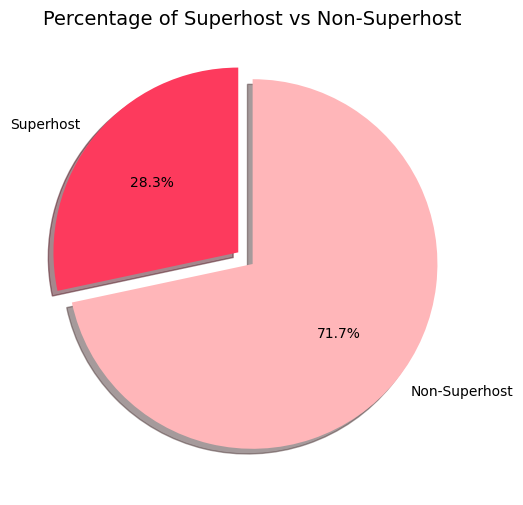

In [ ]:
# Tính toán phần trăm giá trị 't' và 'f' trong cột 'host_is_superhost'
percentages = df_listings['host_is_superhost'].value_counts(normalize=True) * 100
percentages = percentages[['t', 'f']]

# Vẽ biểu đồ tròn
plt.figure(figsize=(6, 6))
percentages.plot.pie(
    labels=['Superhost', 'Non-Superhost'],
    autopct='%1.1f%%',
    colors=['#fd3a5d', '#FFB6B9'],
    startangle=90,
    explode=(0.1, 0),  # Tách nhẹ phần Superhost
    shadow=True
)
plt.title('Percentage of Superhost vs Non-Superhost', fontsize=14)
plt.ylabel('')  # Loại bỏ nhãn trục Y
plt.show()

In [ ]:
# Gộp các neighbouhood lại thành các khu vực
area_mapping = {
    'Bang Sue': 'North Bangkok',
    'Lak Si': 'North Bangkok',
    'Sai Mai': 'North Bangkok',
    'Chatu Chak' : 'North Bangkok',
    'Don Mueang': 'North Bangkok',
    'Bang Khen': 'North Bangkok',
    'Chatuchak': 'North Bangkok',
    'Bang Kapi': 'East Bangkok',
    'Lat Krabang': 'East Bangkok',
    'Wang Thong Lang': 'East Bangkok',
    'Nong Chok': 'East Bangkok',
    'Bueng Kum': 'East Bangkok',
    'Min Buri': 'East Bangkok',
    'Saphan Sung' :'East Bangkok',
    'Khlong Sam Wa': 'East Bangkok',
    'Lat Phrao' : 'East Bangkok',
    'Khan Na Yao': 'East Bangkok',
    'Bangkok Yai': 'West Bangkok',
    'Khlong San' : 'West Bangkok',
    'Thon buri' : 'West Bangkok',
    'Thon Buri': 'West Bangkok',
    'Thung khru': 'West Bangkok',
    'Bang Phlat': 'West Bangkok',
    'Taling Chan': 'West Bangkok',
    'Phasi Charoen': 'West Bangkok',
    'Bang Khae': 'West Bangkok',
    'Bangkok Noi': 'West Bangkok',
    'Sathon': 'South Bangkok',
    'Phra Khanong' : 'South Bangkok',
    'Yan Nawa': 'South Bangkok',
    'Suanluang': 'South Bangkok',
    'Bang Na' : 'South Bangkok',
    'Bang Kho laen' : 'South Bangkok',
    'Bang Kho Laem': 'South Bangkok',
    'Rat Burana': 'South Bangkok',
    'Yan na wa': 'South Bangkok',
    'Ratchathewi': 'Central Bangkok',
    'Pra Wet' : 'Central Bangkok',
    'Parthum Wan': 'Central Bangkok',
    'Din Daeng': 'Central Bangkok',
    'Khlong Toei': 'Central Bangkok',
    'Phaya Thai': 'Central Bangkok',
    'Vadhana': 'Central Bangkok',
    'Huai Khwang': 'Central Bangkok',
    'Bang Rak': 'Central Bangkok',
    'Pathum Wan': 'Central Bangkok',
    'Phra Nakhon': 'Central Bangkok',
    'Dusit': 'Central Bangkok',
    'Pom Prap Sattru Phai': 'Central Bangkok',
    'Samphanthawong': 'Central Bangkok',
    'Bang Bon': 'Outer Western Bangkok',
    'Chom Thong': 'Outer Western Bangkok',
    'Thawi Watthana': 'Outer Western Bangkok',
    'Bang Khun thain': 'Outer Western Bangkok',
    'Nong Khaem': 'Outer Western Bangkok'
}

df_listings['area'] = df_listings['neighbourhood_cleansed'].map(area_mapping)

In [ ]:
df_listings.groupby(['host_is_superhost','area'])['price'].mean()

host_is_superhost  area                 
f                  Central Bangkok          2988.652069
                   East Bangkok             2183.309415
                   North Bangkok            1627.799374
                   Outer Western Bangkok    1936.343271
                   South Bangkok            1974.215191
                   West Bangkok             1991.938332
t                  Central Bangkok          2433.827166
                   East Bangkok             2150.908472
                   North Bangkok            1466.044436
                   Outer Western Bangkok     994.076923
                   South Bangkok            1585.602362
                   West Bangkok             1355.435002
Name: price, dtype: float64

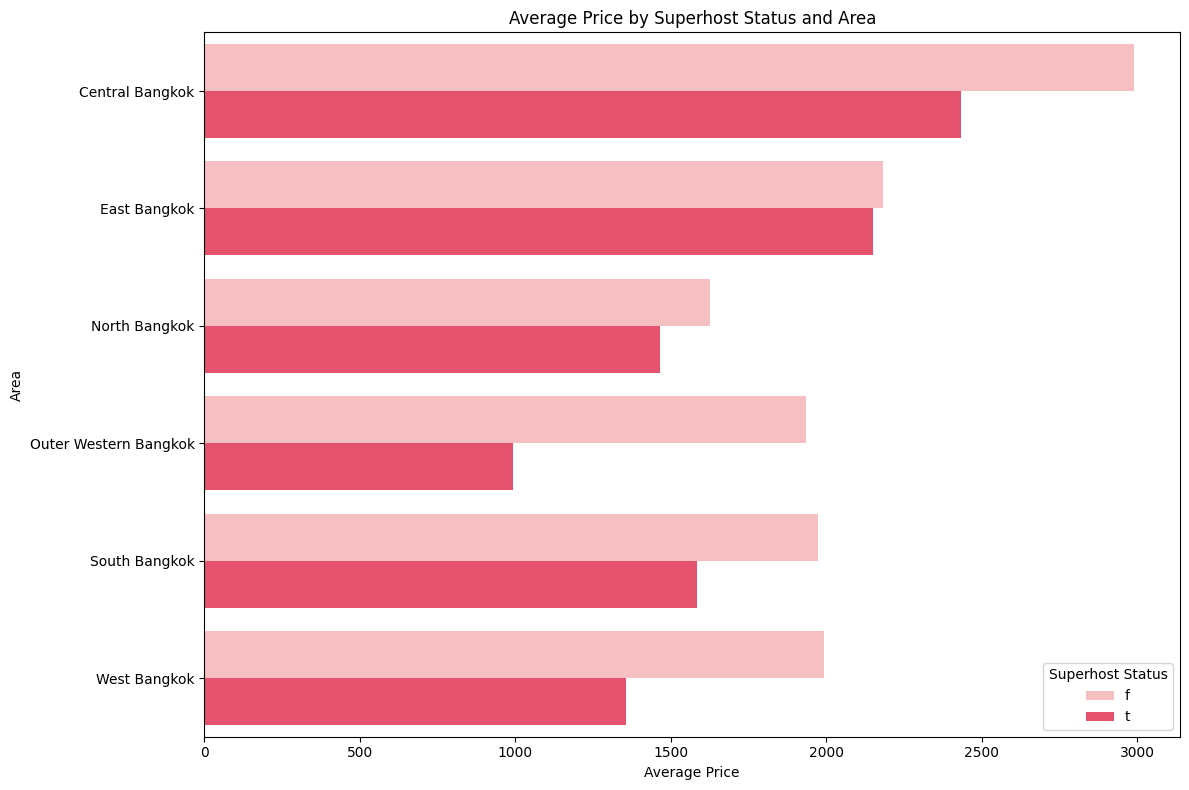

In [ ]:
# Tính giá trung bình theo 'host_is_superhost' và 'area'
avg_price = df_listings.groupby(['host_is_superhost', 'area'])['price'].mean().reset_index()

# Tạo bảng màu tương ứng với Airbnb (đỏ đặc trưng và màu nhẹ hơn cho không phải superhost)
airbnb_colors = ['#FFB6B9', '#fd3a5d']

# Tạo biểu đồ cột
plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='area', hue='host_is_superhost', data=avg_price, palette=airbnb_colors,orient='h')

plt.title('Average Price by Superhost Status and Area')
plt.xlabel('Average Price')
plt.ylabel('Area')
plt.legend(title='Superhost Status', loc='lower right')

plt.tight_layout()
plt.show()

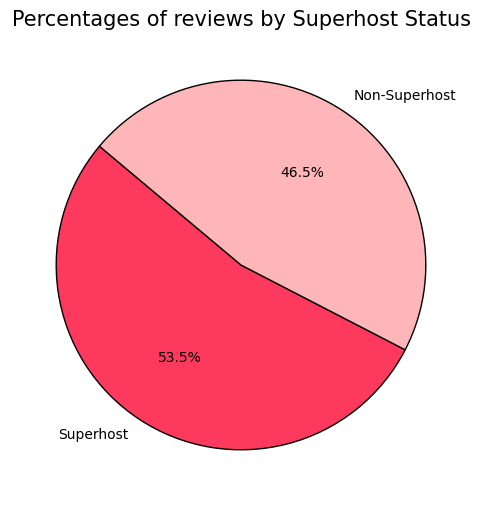

In [ ]:
# Tính tổng số lượng đánh giá theo 'host_is_superhost'
total_reviews = df_listings['number_of_reviews'].sum()

# Tính tổng số lượng đánh giá cho Superhost và Non-Superhost
reviews_by_superhost = df_listings[df_listings['host_is_superhost'] == 't']['number_of_reviews'].sum()
reviews_by_non_superhost = df_listings[df_listings['host_is_superhost'] == 'f']['number_of_reviews'].sum()

# Tính tỷ lệ phần trăm
sizes = [reviews_by_superhost, reviews_by_non_superhost]
labels = ['Superhost', 'Non-Superhost']
percentages = [size / total_reviews * 100 for size in sizes]

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#fd3a5d','#FFB6B9'], startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Percentages of reviews by Superhost Status', fontsize=15)

plt.show()

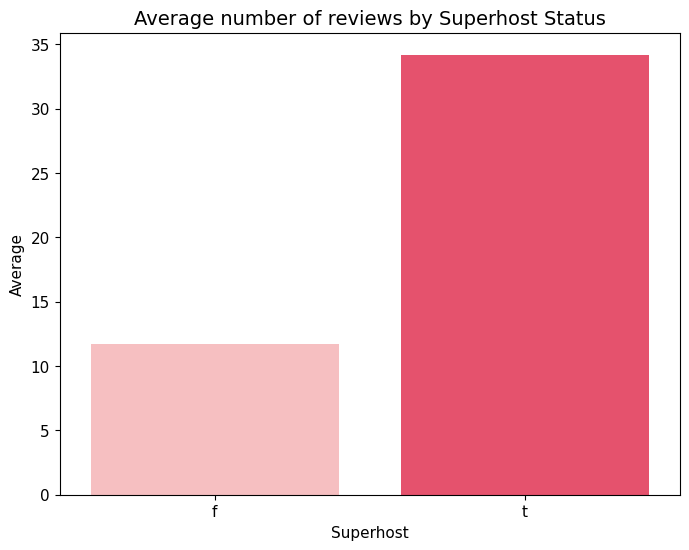

In [ ]:
# Tính trung bình số lượng đánh giá theo 'host_is_superhost'
mean_reviews = df_listings.groupby('host_is_superhost')['number_of_reviews'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=mean_reviews, x='host_is_superhost', y='number_of_reviews', palette=airbnb_colors)

plt.title('Average number of reviews by Superhost Status', fontsize=14)
plt.xlabel('Superhost', fontsize=11)
plt.ylabel('Average', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

In [ ]:
# Tạo cột tỉ lệ phản hồi, chấp thuận của host
df_listings['host_response_rate']=df_listings['host_response_rate']/100
df_listings['host_acceptance_rate']=df_listings['host_acceptance_rate']/100

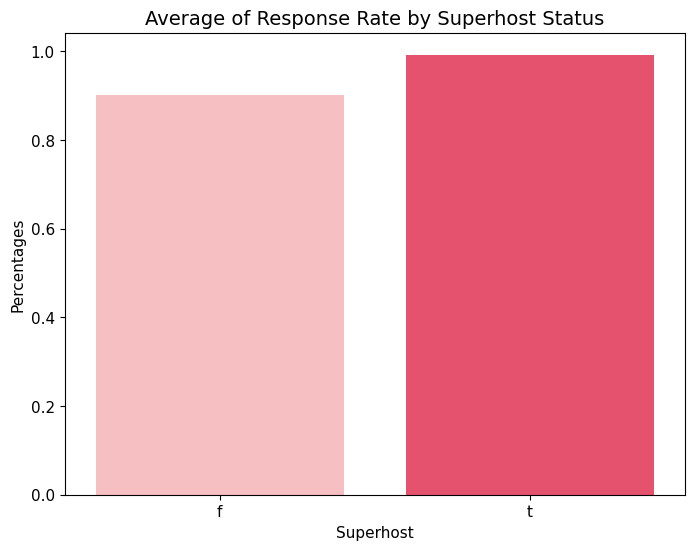

In [ ]:
# Tính trung bình tỷ lệ phản hồi theo 'host_is_superhost'
mean_response_rate = df_listings.groupby('host_is_superhost')['host_response_rate'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=mean_response_rate, x='host_is_superhost', y='host_response_rate', palette=airbnb_colors)

plt.title('Average of Response Rate by Superhost Status', fontsize=14)
plt.xlabel('Superhost', fontsize=11)
plt.ylabel('Percentages', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

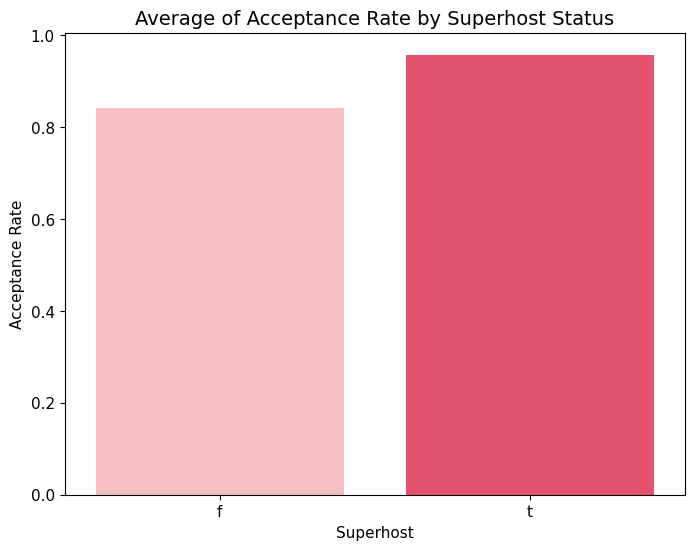

In [ ]:
# Tính trung bình tỷ lệ chấp thuận theo 'host_is_superhost'
mean_response_rate = df_listings.groupby('host_is_superhost')['host_acceptance_rate'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=mean_response_rate, x='host_is_superhost', y='host_acceptance_rate', palette=airbnb_colors)

plt.title('Average of Acceptance Rate by Superhost Status', fontsize=14)
plt.xlabel('Superhost', fontsize=11)
plt.ylabel('Acceptance Rate', fontsize=11)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.show()

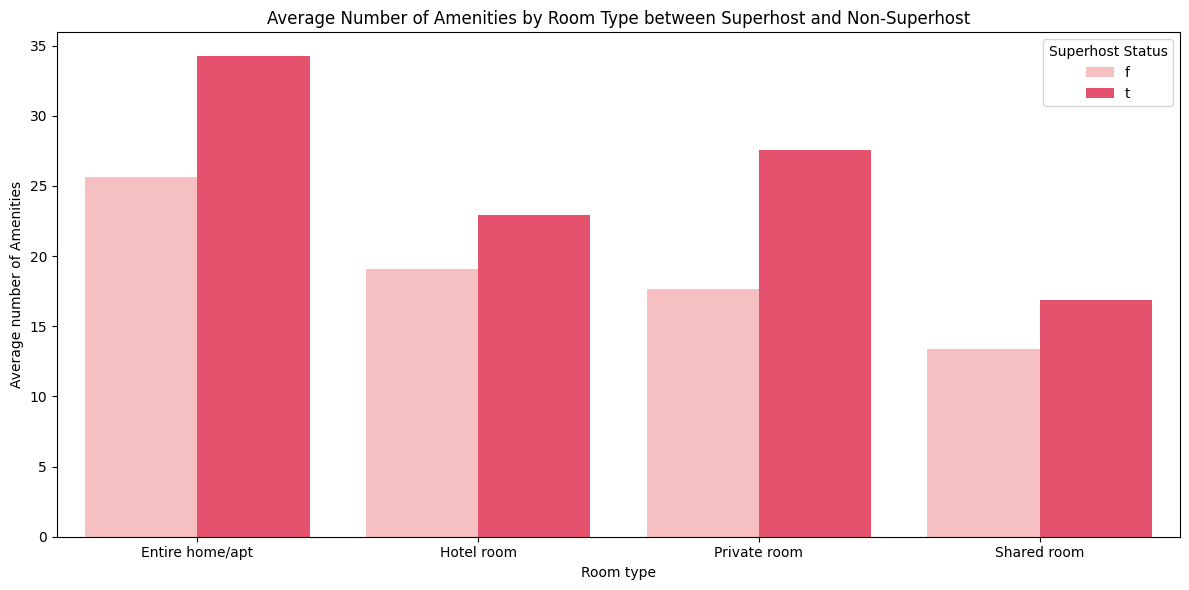

In [ ]:
df = df_listings[['host_is_superhost', 'amenities', 'room_type']]

# Xử lý cột amenities
def process_amenities(amenities_str):
    try:
        amenities_list = ast.literal_eval(amenities_str)
        amenities_list = [amenity.strip().strip('"') for amenity in amenities_list]
        return amenities_list
    except:
        return []

df['amenities_list'] = df['amenities'].apply(process_amenities)

# Tính số lượng tiện nghi cho mỗi chỗ ở
df['amenities_count'] = df['amenities_list'].apply(len)

# Nhóm theo room_type và host_is_superhost, tính số lượng tiện nghi trung bình
amenities_by_room_type = df.groupby(['room_type', 'host_is_superhost'])['amenities_count'].mean().reset_index()

# Vẽ biểu đồ so sánh số lượng tiện nghi giữa Super Hosts và Non-Super Hosts theo room_type
plt.figure(figsize=(12,6))
sns.barplot(data=amenities_by_room_type, x='room_type', y='amenities_count', hue='host_is_superhost', palette=airbnb_colors)
plt.title('Average Number of Amenities by Room Type between Superhost and Non-Superhost')
plt.ylabel('Average number of Amenities')
plt.xlabel('Room type')

plt.legend(title='Superhost Status', loc='best')
plt.tight_layout()

plt.show()

In [ ]:
df_rating_notnull=df_listings.dropna(subset=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value'])

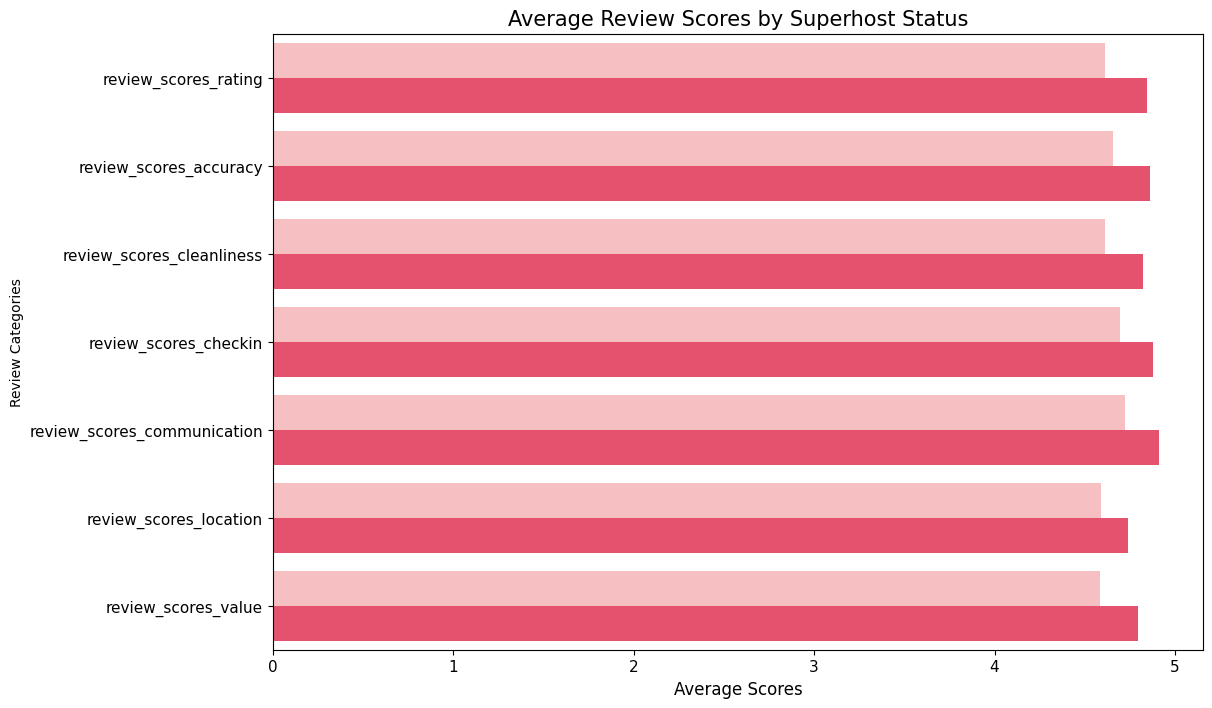

In [ ]:
# Lọc các cột review_scores
review_columns = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                  'review_scores_value']

# Tính trung bình cho mỗi review score theo 'host_is_superhost'
df_review = df_rating_notnull[review_columns + ['host_is_superhost']]
mean_reviews = df_review.groupby('host_is_superhost')[review_columns].mean().reset_index()

# Chuyển dữ liệu thành định dạng dài (long format) để vẽ biểu đồ
df_long = mean_reviews.melt(id_vars='host_is_superhost', var_name='review_category', value_name='average_score')

# Vẽ biểu đồ cột ngang với seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=df_long, y='review_category', x='average_score', hue='host_is_superhost', palette=airbnb_colors, orient='h')

plt.title('Average Review Scores by Superhost Status', fontsize=15)
plt.xlabel('Average Scores', fontsize=12)
plt.ylabel('Review Categories', fontsize=10)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend().set_visible(False)

plt.show()